<a href="https://colab.research.google.com/github/AditiG10/Classification-of-COVID-19-chest-X-ray-images/blob/master/ResNet152_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet152V2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [3]:
# import libraries
import json
import math
import os
import random
from glob import glob 
from tqdm import tqdm
from PIL import Image
import cv2 # image processing
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization


from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [4]:
!git clone https://github.com/vaibhavG321/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 331, done.
remote: Total 331 (delta 0), reused 0 (delta 0), pack-reused 331
Receiving objects: 100% (331/331), 80.94 MiB | 30.01 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [5]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images


In [6]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset


In [7]:
input_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/"
train_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training"
test_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing"
val_dir = "/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation"

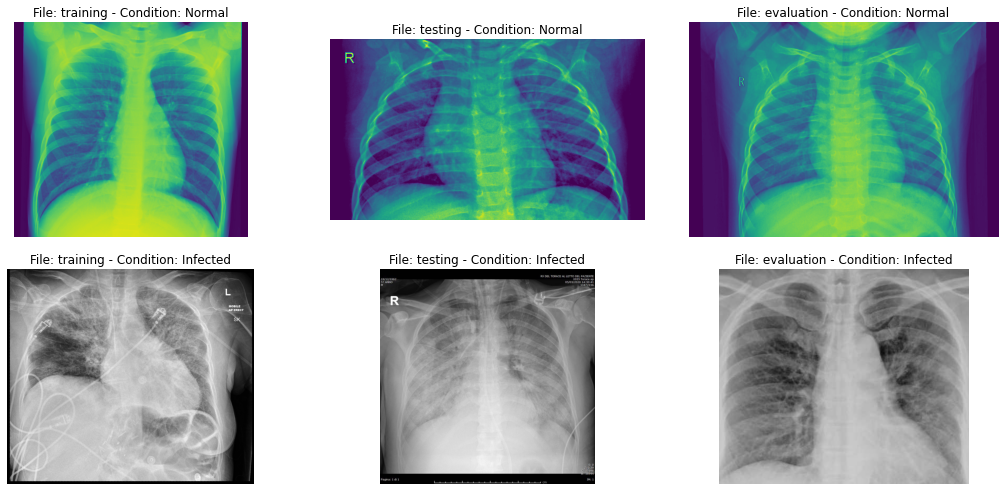

In [8]:
fig, ax = plt.subplots(2,3, figsize=(15,7))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['training','testing','evaluation']):
    set_path = input_dir+_set
    ax[i].axis('off')
    ax[i].imshow(plt.imread(set_path+'/normal/'+os.listdir(set_path+'/normal')[0]))
    ax[i].set_title('File: {} - Condition: Normal'.format(_set))
    ax[i+3].axis('off')
    ax[i+3].imshow(plt.imread(set_path+'/infected/'+os.listdir(set_path+'/infected')[0]))
    ax[i+3].set_title('File: {} - Condition: Infected'.format(_set))

In [9]:
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='binary')

Found 187 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [12]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.applications import ResNet152V2
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img

Using TensorFlow backend.


In [13]:
# Create ResNet152-V2 Model with Keras library

def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['acc']
    )
    return model

densenet = ResNet152V2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

model = build_model(densenet ,lr = 1e-4)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Model)          (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 58,341,889
Trainable params: 58,194,049
Non-trainable params: 147,840
_________________________________________________________________


In [15]:
# Fit Model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=test_generator,
    validation_steps=10
)

Epoch 1/10
100/100 [==============================] - 1175s 12s/step - loss: 0.2613 - acc: 0.8865 - val_loss: 0.0087 - val_acc: 0.9125
Epoch 2/10
100/100 [==============================] - 1158s 12s/step - loss: 0.1757 - acc: 0.9308 - val_loss: 0.1200 - val_acc: 0.9872
Epoch 3/10
100/100 [==============================] - 1157s 12s/step - loss: 0.1322 - acc: 0.9641 - val_loss: 0.0661 - val_acc: 0.9615
Epoch 4/10
100/100 [==============================] - 1147s 11s/step - loss: 0.1295 - acc: 0.9538 - val_loss: 0.0061 - val_acc: 0.9615
Epoch 5/10
100/100 [==============================] - 1148s 11s/step - loss: 0.1040 - acc: 0.9643 - val_loss: 0.5257 - val_acc: 0.9231
Epoch 6/10
100/100 [==============================] - 1136s 11s/step - loss: 0.0773 - acc: 0.9690 - val_loss: 0.1207 - val_acc: 0.9744
Epoch 7/10
100/100 [==============================] - 1141s 11s/step - loss: 0.1405 - acc: 0.9603 - val_loss: 0.1578 - val_acc: 1.0000
Epoch 8/10
100/100 [==============================] - 1

In [16]:
score = model.evaluate_generator(test_generator,verbose=1)
print("The accuracy is ",score[1])

12/12 [==============================] - 37s 3s/step
The accuracy is  1.0


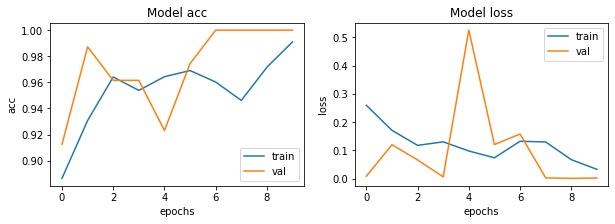

In [17]:
# Visualize Loss and Accuracy Rates
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [20]:
# model save
model.save_weights("cnn-covid-19-xray-resnet152-v2.h5")

In [27]:
def choose_image_and_predict():
    normal_or_covid = ['normal', 'covid']
    folder_choice = (random.choice(normal_or_covid))
    
    covid_images = glob(r'/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/'+folder_choice+'/*')
    img_choice = (random.choice(covid_images))

    img = load_img(img_choice, target_size=(224, 224))
    img = img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    pred_class = model.predict_classes(x)
    pred = model.predict(x)
    print("Actual class:", folder_choice)
    if pred_class[0] == 0:
        print("Predicted class: normal")
        print("Likelihood:", pred[0][0].round(4))
        if pred[0][0].round(4) < 0.8:
            print("WARNING, low confidence")
    else:
        print("Predicted class: covid")
        print('Likelihood:', pred[0][1].round(4))
        if pred[0][1].round(4) < 0.8:
            print("WARNING, low confidence")        
        
choose_image_and_predict()

IndexError: ignored